## Observations and Insights

## Dependencies and starter code

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_mouse_outer = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')
combine_mouse_outer.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [70]:
#Progress: checking on Drug Regimen values
index_drugRegimen = combine_mouse_outer.set_index('Drug Regimen')
index_drugRegimen

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [71]:
#Progress: recategorising dataframe based on Drug Regimen, focus on collecting the values of Tumor Volume
sem_list = combine_mouse_outer.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
sem_list_Capomulin = sem_list.loc[sem_list['Drug Regimen']=='Capomulin']
sem_list_Ceftamin=sem_list.loc[sem_list['Drug Regimen']=='Ceftamin']
sem_list_Infubinol=sem_list.loc[sem_list['Drug Regimen']=='Infubinol']
sem_list_Ketapril =sem_list.loc[sem_list['Drug Regimen']=='Ketapril']
sem_list_Naftisol=sem_list.loc[sem_list['Drug Regimen']=='Naftisol']
sem_list_Placebo=sem_list.loc[sem_list['Drug Regimen']=='Placebo']
sem_list_Propriva= sem_list.loc[sem_list['Drug Regimen']=='Propriva']
sem_list_Ramicane=sem_list.loc[sem_list['Drug Regimen']=='Ramicane']
sem_list_Stelasyn=sem_list.loc[sem_list['Drug Regimen']=='Stelasyn']
sem_list_Zoniferol=sem_list.loc[sem_list['Drug Regimen']=='Zoniferol']

#Progress: calculating SEM of each drug
sem_Capomulin = st.sem(sem_list_Capomulin['Tumor Volume (mm3)'])
sem_Ceftamin = st.sem(sem_list_Ceftamin['Tumor Volume (mm3)'])
sem_Infubinol = st.sem(sem_list_Infubinol['Tumor Volume (mm3)'])
sem_Ketapril = st.sem(sem_list_Ketapril['Tumor Volume (mm3)'])
sem_Naftisol = st.sem(sem_list_Naftisol['Tumor Volume (mm3)'])
sem_Placebo = st.sem(sem_list_Placebo['Tumor Volume (mm3)'])
sem_Propriva = st.sem(sem_list_Propriva['Tumor Volume (mm3)'])
sem_Ramicane = st.sem(sem_list_Ramicane['Tumor Volume (mm3)'])
sem_Stelasyn = st.sem(sem_list_Stelasyn['Tumor Volume (mm3)'])
sem_Zoniferol = st.sem(sem_list_Zoniferol['Tumor Volume (mm3)'])

#Progress: compile results into a list
sem_drug = [sem_Capomulin,sem_Ceftamin,sem_Infubinol,sem_Ketapril,sem_Naftisol,sem_Placebo,sem_Propriva,sem_Ramicane,sem_Stelasyn,sem_Zoniferol]

#Test: checking on data format
sem_drug_df = pd.DataFrame(sem_drug, columns=['SEM'], index =['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])
sem_drug_df

,SEM
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111
Zoniferol,0.516398


## Summary statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Progress: collecting values for mean, median, variance and std of tumor volume for each regimen
summary_mean = combine_mouse_outer.groupby('Drug Regimen').mean()
summary_median = combine_mouse_outer.groupby('Drug Regimen').median()
summary_variance = combine_mouse_outer.groupby('Drug Regimen').var()
summary_std = combine_mouse_outer.groupby('Drug Regimen').std()

summary_mean['Tumor Volume (mm3)']
summary_median['Tumor Volume (mm3)']
summary_variance['Tumor Volume (mm3)']
summary_std['Tumor Volume (mm3)']

#Progress: compiled into a summary dataframe
summary_df = pd.DataFrame({'Mean':summary_mean['Tumor Volume (mm3)'], 'Median': summary_median['Tumor Volume (mm3)'], 'Variance':summary_variance['Tumor Volume (mm3)'], 'Standard Deviation':summary_std['Tumor Volume (mm3)'], 'SEM':sem_drug })
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [73]:
Regimen_Datapoint = combine_mouse_outer['Drug Regimen'].value_counts()
Regimen_Datapoint

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [74]:
Regimen_Datapoint_2Col = Regimen_Datapoint.reset_index()
Regimen_Datapoint_2Col = Regimen_Datapoint_2Col.rename(columns={'index':'Drug', 'Drug Regimen': 'Regimen Count'})
Regimen_Datapoint_2Col

,Drug,Regimen Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,161


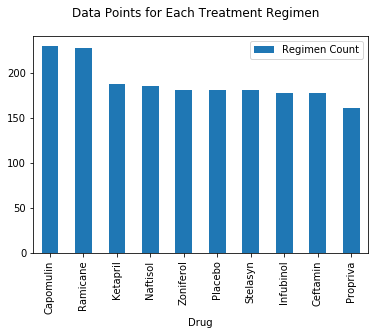

In [75]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Regimen_Datapoint_df = pd.DataFrame(Regimen_Datapoint_2Col)
Regimen_Datapoint_df_labeled = Regimen_Datapoint_df.plot.bar(x='Drug',y='Regimen Count')
pl.suptitle("Data Points for Each Treatment Regimen")

Regimen_Datapoint_df_labeled

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

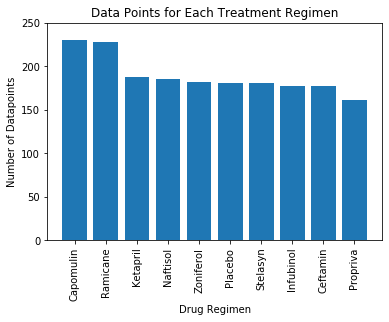

In [76]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.title("Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")

plt.bar(Regimen_Datapoint_2Col['Drug'],Regimen_Datapoint_2Col['Regimen Count'])
plt.xticks(rotation=90)
plt.ylim(0,250)

plt.bar

## Pie plots

In [77]:
f_vs_m = combine_mouse_outer['Sex'].value_counts()
f_vs_m

Male      958
Female    935
Name: Sex, dtype: int64

In [78]:
sex_list = f_vs_m.keys()
sex_list

Index(['Male', 'Female'], dtype='object')

In [79]:
f_vs_m_2 = f_vs_m.reset_index()
f_vs_m_2 = f_vs_m_2.rename(columns={'index':'Sex', 'Sex': 'Sex Count'})
f_vs_m_2['Sex Count']

0    958
1    935
Name: Sex Count, dtype: int64

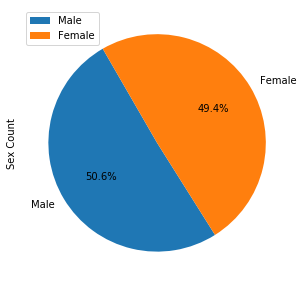

In [80]:
Data = {'Sex Count': f_vs_m}
df = pd.DataFrame(Data,columns=['Sex Count'],index = sex_list)

df.plot.pie(y='Sex Count',figsize=(5, 5), autopct="%1.1f%%", startangle=120)
plt.show()

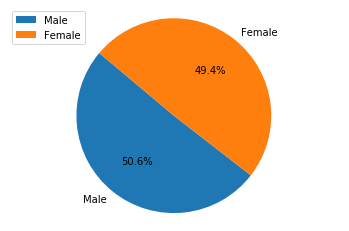

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(f_vs_m, explode=None, labels=sex_list, colors=None,
        autopct="%1.1f%%", shadow=None, startangle=140)
plt.legend(sex_list, loc="best")
plt.axis("equal")


plt.show()

## Quartiles, outliers and boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Part 1 (calculate final tumor volume by minusing min tumor volume of a given drug regimen with its max tumor volume, disregarding sex)

# Reusing prepped dataframes from above (moving them down here again for clarity)
sem_list_Capomulin = sem_list.loc[sem_list['Drug Regimen']=='Capomulin']
sem_list_Ceftamin=sem_list.loc[sem_list['Drug Regimen']=='Ceftamin']
sem_list_Infubinol=sem_list.loc[sem_list['Drug Regimen']=='Infubinol']
sem_list_Ketapril =sem_list.loc[sem_list['Drug Regimen']=='Ketapril']
sem_list_Naftisol=sem_list.loc[sem_list['Drug Regimen']=='Naftisol']
sem_list_Placebo=sem_list.loc[sem_list['Drug Regimen']=='Placebo']
sem_list_Propriva= sem_list.loc[sem_list['Drug Regimen']=='Propriva']
sem_list_Ramicane=sem_list.loc[sem_list['Drug Regimen']=='Ramicane']
sem_list_Stelasyn=sem_list.loc[sem_list['Drug Regimen']=='Stelasyn']
sem_list_Zoniferol=sem_list.loc[sem_list['Drug Regimen']=='Zoniferol']

#Progress: (max value - min value)of tumor volume size, by drug regimen
Capomulin_effect=sem_list_Capomulin['Tumor Volume (mm3)'].max()-sem_list_Capomulin['Tumor Volume (mm3)'].min()
Ceftamin_effect=sem_list_Ceftamin['Tumor Volume (mm3)'].max()-sem_list_Ceftamin['Tumor Volume (mm3)'].min()
Infubinol_effect=sem_list_Infubinol['Tumor Volume (mm3)'].max()-sem_list_Infubinol['Tumor Volume (mm3)'].min()
Ketapril_effect=sem_list_Ketapril['Tumor Volume (mm3)'].max()-sem_list_Ketapril['Tumor Volume (mm3)'].min()
Naftisol_effect=sem_list_Naftisol['Tumor Volume (mm3)'].max()-sem_list_Naftisol['Tumor Volume (mm3)'].min()
Placebo_effect=sem_list_Placebo['Tumor Volume (mm3)'].max()-sem_list_Placebo['Tumor Volume (mm3)'].min()
Propriva_effect=sem_list_Propriva['Tumor Volume (mm3)'].max()-sem_list_Propriva['Tumor Volume (mm3)'].min()
Ramicane_effect=sem_list_Ramicane['Tumor Volume (mm3)'].max()-sem_list_Ramicane['Tumor Volume (mm3)'].min()
Stelasyn_effect=sem_list_Stelasyn['Tumor Volume (mm3)'].max()-sem_list_Stelasyn['Tumor Volume (mm3)'].min()
Zoniferol_effect=sem_list_Zoniferol['Tumor Volume (mm3)'].max()-sem_list_Zoniferol['Tumor Volume (mm3)'].min()

#Progress: created dataframe to find out which four drug regimens has greatest effect on reducing tumor volume.
regimen_effect = [Capomulin_effect,Ceftamin_effect,Infubinol_effect,Ketapril_effect,Naftisol_effect,Placebo_effect,Propriva_effect,Ramicane_effect,Stelasyn_effect,Zoniferol_effect]
regimen_effect_df = pd.DataFrame(regimen_effect, columns=['Tumor Volume Difference (max-min)'], index =['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])

regimen_effect_df.sort_values(by=['Tumor Volume Difference (max-min)'])

,Tumor Volume Difference (max-min)
Ceftamin,23.923185
Capomulin,24.814612
Ramicane,25.572690
Propriva,27.455421
Placebo,28.212939
Zoniferol,28.324432
Stelasyn,30.123690
Naftisol,31.668817
Ketapril,33.567014
Infubinol,35.905385


In [83]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Part 2

# Equations for IQR,Q1,Q3,Outliers(high and low) and cleaned series of the four promising regimens.
iqr_Ceftamin = sem_list_Ceftamin['Tumor Volume (mm3)'].quantile(.75)-sem_list_Ceftamin['Tumor Volume (mm3)'].quantile(.25)
q1_Ceftamin = sem_list_Ceftamin['Tumor Volume (mm3)'].quantile(.25)
q3_Ceftamin = sem_list_Ceftamin['Tumor Volume (mm3)'].quantile(.75)
fenceLow_Ceftamin = (q1_Ceftamin - 1.5*iqr_Ceftamin)
fenceHigh_Ceftamin = (q3_Ceftamin + 1.5*iqr_Ceftamin)
outlierRemoved_Ceftamin = sem_list_Ceftamin[sem_list_Ceftamin['Tumor Volume (mm3)'] > fenceLow_Ceftamin]
outlierRemoved_Ceftamin = sem_list_Ceftamin[sem_list_Ceftamin['Tumor Volume (mm3)'] < fenceHigh_Ceftamin]

iqr_Capomulin = sem_list_Capomulin['Tumor Volume (mm3)'].quantile(.75)-sem_list_Capomulin['Tumor Volume (mm3)'].quantile(.25)
q1_Capomulin = sem_list_Capomulin['Tumor Volume (mm3)'].quantile(.25)
q3_Capomulin = sem_list_Capomulin['Tumor Volume (mm3)'].quantile(.75)
fenceLow_Capomulin = (q1_Capomulin - 1.5*iqr_Capomulin)
fenceHigh_Capomulin = (q3_Capomulin + 1.5*iqr_Capomulin)
outlierRemoved_Capomulin = sem_list_Capomulin[sem_list_Capomulin['Tumor Volume (mm3)'] > fenceLow_Capomulin]
outlierRemoved_Capomulin = sem_list_Capomulin[sem_list_Capomulin['Tumor Volume (mm3)'] < fenceHigh_Capomulin]

iqr_Ramicane = sem_list_Ramicane['Tumor Volume (mm3)'].quantile(.75)-sem_list_Ramicane['Tumor Volume (mm3)'].quantile(.25)
q1_Ramicane = sem_list_Ramicane['Tumor Volume (mm3)'].quantile(.25)
q3_Ramicane = sem_list_Ramicane['Tumor Volume (mm3)'].quantile(.75)
fenceLow_Ramicane = (q1_Ramicane - 1.5*iqr_Ramicane)
fenceHigh_Ramicane = (q3_Ramicane + 1.5*iqr_Ramicane)
outlierRemoved_Ramicane = sem_list_Ramicane[sem_list_Ramicane['Tumor Volume (mm3)'] > fenceLow_Ramicane]
outlierRemoved_Ramicane = sem_list_Ramicane[sem_list_Ramicane['Tumor Volume (mm3)'] < fenceHigh_Ramicane]

iqr_Propriva = sem_list_Propriva['Tumor Volume (mm3)'].quantile(.75)-sem_list_Propriva['Tumor Volume (mm3)'].quantile(.25)
q1_Propriva = sem_list_Propriva['Tumor Volume (mm3)'].quantile(.25)
q3_Propriva = sem_list_Propriva['Tumor Volume (mm3)'].quantile(.75)
fenceLow_Propriva = (q1_Propriva - 1.5*iqr_Propriva)
fenceHigh_Propriva = (q3_Propriva + 1.5*iqr_Propriva)
outlierRemoved_Propriva = sem_list_Propriva[sem_list_Propriva['Tumor Volume (mm3)'] > fenceLow_Propriva]
outlierRemoved_Propriva = sem_list_Propriva[sem_list_Propriva['Tumor Volume (mm3)'] < fenceHigh_Propriva]

outlierRemoved_Ceftamin,outlierRemoved_Capomulin,outlierRemoved_Ramicane,outlierRemoved_Propriva.dtypes

(     Drug Regimen  Tumor Volume (mm3)
 484      Ceftamin           45.000000
 485      Ceftamin           46.795257
 486      Ceftamin           47.371343
 487      Ceftamin           49.734404
 488      Ceftamin           50.513437
 ...           ...                 ...
 1851     Ceftamin           57.173538
 1852     Ceftamin           59.033275
 1853     Ceftamin           61.153140
 1854     Ceftamin           63.469549
 1855     Ceftamin           64.729837
 
 [178 rows x 2 columns],
      Drug Regimen  Tumor Volume (mm3)
 10      Capomulin           45.000000
 11      Capomulin           43.878496
 12      Capomulin           37.614948
 13      Capomulin           38.177232
 14      Capomulin           36.866876
 ...           ...                 ...
 440     Capomulin           47.685963
 1452    Capomulin           45.000000
 1453    Capomulin           45.597064
 1454    Capomulin           46.059608
 1455    Capomulin           46.539206
 
 [230 rows x 2 columns],
     Drug 

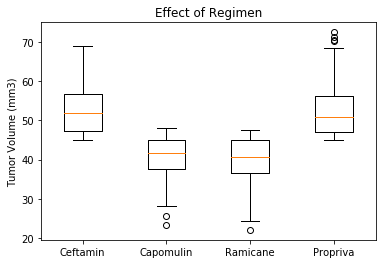

In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ceftamin_tumor = sem_list_Ceftamin['Tumor Volume (mm3)']
capomulin_tumor = sem_list_Capomulin['Tumor Volume (mm3)']
ramicane_tumor = sem_list_Ramicane['Tumor Volume (mm3)']
propriva_tumor = sem_list_Propriva['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Effect of Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')


ax1.boxplot([ceftamin_tumor,capomulin_tumor,ramicane_tumor,propriva_tumor], labels =['Ceftamin','Capomulin','Ramicane','Propriva']);
plt.show()


## Line and scatter plots

In [85]:
# Progress: trying to find out what mouse uses Capomulin
Capomulin_regimen = combine_mouse_outer['Drug Regimen'] =='Capomulin'
combine_mouse_outer[Capomulin_regimen]
# Progress: picked s185
mouse_s185 = combine_mouse_outer['Mouse ID'] == 's185'
combine_mouse_outer[mouse_s185]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


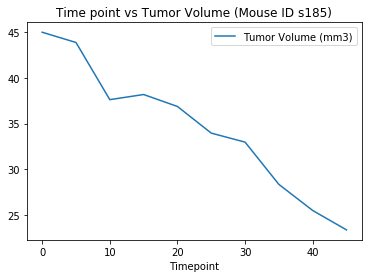

In [86]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combine_mouse_outer[mouse_s185].plot.line(x='Timepoint',y='Tumor Volume (mm3)')
plt.title("Time point vs Tumor Volume (Mouse ID s185)")


plt.show()

In [87]:
#Progress: creating new dataframe with mouse ID as index and getting the average values of Tumor Volume
by_mouse_Capomulin_WvsTV = combine_mouse_outer[Capomulin_regimen].groupby('Mouse ID').mean()
by_mouse_Capomulin_WvsTV

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


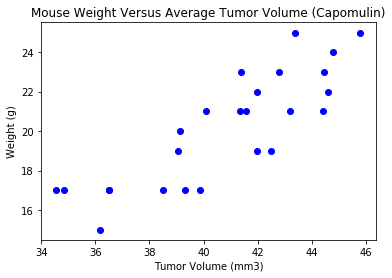

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_y = by_mouse_Capomulin_WvsTV['Weight (g)']
scatter_x = by_mouse_Capomulin_WvsTV['Tumor Volume (mm3)']
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title ('Mouse Weight Versus Average Tumor Volume (Capomulin)')
plt.scatter(scatter_x,scatter_y,label ='Mouse ID', color='b')
plt.show()

In [89]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient

cc_WvsTV = by_mouse_Capomulin_WvsTV[['Weight (g)','Tumor Volume (mm3)']]
cc_WvsTV.corr(method='pearson')

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


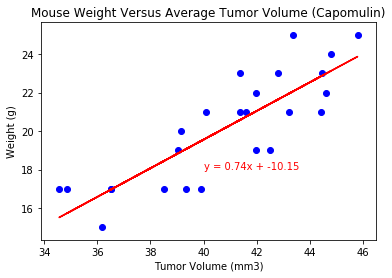

In [90]:
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_x, scatter_y)
regress_values = scatter_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(scatter_x,regress_values,"r-")
plt.xlabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(40,18),fontsize=10,color="red")
plt.ylabel('Weight (g)')
plt.title ('Mouse Weight Versus Average Tumor Volume (Capomulin)')
plt.scatter(scatter_x,scatter_y,label ='Mouse ID', color='b')
plt.show()